# Máquina de Atwood

[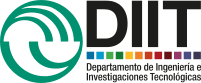](https://ingenieria.unlam.edu.ar/)  
2022 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

## Enunciado
1. Obtenga con la ecuación de Euler-Lagrange la ecuación de la dinámica. 
Simplifique el problema considerando que la poleas de radio \\(R\\) tiene masa nula (\\(M=0\\)).
2. Compare las aceleraciones con las obtenidas usando ecuaciones de Newton.  

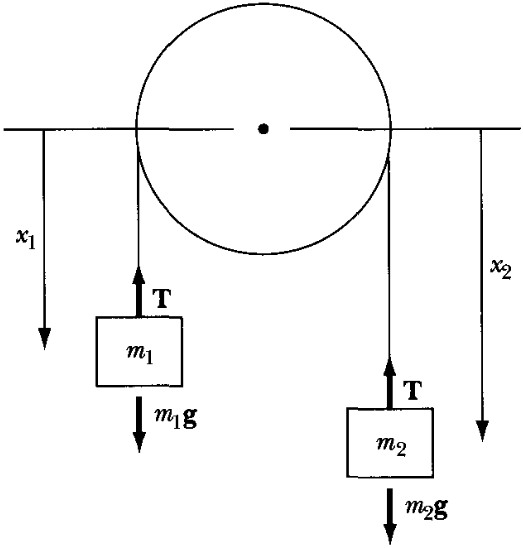

## El modelo físico

In [1]:
import sympy as sym # módulo de cálculo simbólico
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
# Sistema de coordenadas
e = mech.ReferenceFrame('e') # sistema de coordenadas
t = sym.symbols('t') # tiempo

# Parámetros físicos del sistema
M, R, m1, m2, g, l = sym.symbols('M, R, m_1, m_2, g, \ell', positive=True)

# Coordenadas generalizadas 
x1, x2 = mech.dynamicsymbols('x_1, x_2')

### Ligaduras
Cada vez que el modelo físico implica una relación entre coordenadas o velocidades generalizades se está asumiendo la existencia de una **ligadura** entre estas.

La más evidente en este sistema es la de suponer la cuerda inextensible.
En tal caso esta establece una ligadura entre las coordenadas de ambas partículas que cuelgan desde la polea.

Puesto que de la circunferencia de la polea de radio $R$ la cuerda cubre un arco de la mitad de la misma $\pi R$, su longitud total $\ell$ corresponde a la suma de este con la distancia vertical que separa su centro de masa con el de las pesas que cuelgan según
$$
x_1+ x_2 + \pi R = \ell
$$
Tal relación es mejor escribirle como una función homogénea (igualada al valor nulo $0$)
$$
f_1(x_1, x_2) = x_1+ x_2 + \pi R - \ell = 0
$$ 

In [3]:
f1 = sym.Eq(x1+ x2 + sym.pi* R - l, 0 ) # ligadura l como función homogénea
f1

Hay otra ligadura que involucra a la cuerda.
Si al moverse no desliza en torno a la polea cambia su inclinación.
Esta última podemos describirle con un ángulo, $\theta$.

Un cambio infinitesimal del arco de cuerda sobre la polea causada por un desplazamiento de una de las pesas, e.g. $d x_1$ implica un $d \theta = 
\pi d x_1$.
$$
\pi d x_i - d \theta = 0 
$$

## Resolución reduciendo el número de grados de libertad

Usualmente al conocer la función de ligadura se la aprovecha para despejaría una de las coordenadas generalizadas en función de las otras y así reducir el número de grados de libertad del sistema.

In [4]:
x2_f1 =  sym.solveset(f1.lhs, x2).args[0]
sym.Eq(x2, x2_f1)

### Posiciones en función de una única coordena generalizada

In [5]:
m1_r = -R * e.x + x1* (-e.y) # versor y para arriba
m2_r = R * e.x + x2_f1* (-e.y) # resto longitud hilo x1 y media vuelta polea
m1_r, m2_r

Para lo atañe a lo pedido en este enunciado la posición en $\mathbf{\hat{e}_x}$ es irrelevante, pero es bueno dejarle expresada por si en el futuro se utiliza tal información.

### Energía cinética

In [6]:
# velocidad
m1_v = m1_r.diff(t, e) # se indica que se deriva en sistema de referencia o
m2_v = m2_r.diff(t, e) # se indida que se deriva en sistema de referencia o
m1_v, m2_v

In [7]:
# velocidad al cuadrado
m1_v2 = m1_v.dot(m1_v) # vector producto punto con sigo mismo
m2_v2 = m2_v.dot(m2_v) # vector producto punto con sigo mismo
m1_v2, m2_v2

In [8]:
# Energía cinética del sistema
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
T_m1 = unMedio* m1* m1_v2
T_m2 = unMedio* m2* m1_v2
T = sym.Eq(sym.Symbol('T'), (T_m1 + T_m2).simplify() ) # simplify: simplifica usando factor común y otras operaciones
T

### La ley del menor esfuerzo: programar para trabajar menos

Hay **dos partículas** en el sistema.
Se escribió **dos veces** los mismos comandos para calcular sus velocidades, sus cuadros y con estos sus energías cinéticas.
Una repetición innecesaria puesto que se tiene a disposición un lenguaje de programación general como Python.

Basta **definir una función** que calcule la energía cinética indicando en ella:
- entradas: masa $m$ y posición de una partícula en un marco de referencia $\vec{r}$
- procesos intermedios que deba hacer a partir de las entradas para cálcular la energía cinética como $\frac{m}{2} \vec{v}^2$
- salida: lo que **retornará**, que se escribe tras la sentencia 
```Python
return
```

In [9]:
def energíaCinéticaPartícula(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.  
    """
    velocidad = posición.diff(t, marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* masa* velocidad.dot(velocidad)

In [10]:
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m1

In [11]:
# Energía cinética del sistema
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m2 = energíaCinéticaPartícula(m2, m2_r, e)
T = sym.Eq(sym.Symbol('T'), (T_m1 + T_m2).simplify() ) # simplify: simplifica usando factor común y otras operaciones
T

### Energía potencial gravitatoria

Es igualmente tentador fabricar una función que calcule la energía potencial gravitatoria de cada partícula del sistema a partir de
$$
V_\mathrm{gravitatoria} = - \vec{P} \cdot \vec{r} = - (m \vec{g}) \cdot \vec{r}
$$.

In [12]:
def energíaPotencialGravitatoria(aceleracionGravitatoria, masa, posición):
    """
    aceleracionGravitatoria: vector SymPy orientado con el sistema de referencia
    masa: del cuerpo
    posición: del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    """
    return - (masa* aceleracionGravitatoria).dot(posición)

In [13]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
V_m1 = energíaPotencialGravitatoria(g_vector, m1, m1_r)
V_m2 = energíaPotencialGravitatoria(g_vector, m2, m2_r)
V = sym.Eq(sym.Symbol('V'), (V_m1 + V_m2).simplify() )
V

### Lagrangiano del sistema
Recordemos que hay un único Lagrangiano por sistema calculado con sus energías cinética y potencial que en el caso más general puede depender de las coordenadas y velocidades generalizadas, así como explícitamente con el tiempo
$$
\mathcal{L}(q_i, \dot{q}_i, t) = T(q_i, \dot{q}_i, t)- V(q_i, \dot{q}_i, t).
$$

En este caso solo queda en función de la coordenada generalizada $x_1$ y la velocidad generalizada $\dot{x}_1$
$$
\mathcal{L}(x_1, \dot{x}_1) = T(\dot{x}_1)- V(x_1).
$$

In [14]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), (T.rhs - V.rhs).simplify() )
L

### Un único grado de libertad, una única ecuación de Euler-Lagrange

Aunque en este caso se requiere calcular una única ecuación de Euler-Lagrange, en general se requieren tantas como como coordenadas $q$ hay en el sistema. 

Nuevamente es tentador armar una función que haga el trabajo de calcular
$$
\frac{\partial}{\partial q} \mathcal{L} - \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}} \mathcal{L} = 0
$$

In [15]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.Equality)
        Ecuación de Euler-Lagrange para la coordenadaGeneralizada
    '''
    lagrangiano = T.rhs - V.rhs # no es la ecuación homegénea, si no solo lo que se iguala a 0 
    return sym.Eq(
        lagrangiano.diff(coordenadaGeneralizada) 
        - lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        , 0
    ).simplify()

In [16]:
x1_EL = eulerLagrange(T, V, x1)
x1_EL

### Despejando la aceleración
Podemos despejar $\ddot{x}$ y asignar este resultado a una variable para uso posterior

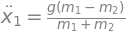

In [17]:
m1_a = sym.Eq(x1.diff(t,2), sym.solve(x1_EL, x1.diff(t,2))[0]  )# [0] toma el único elemento de la lista
m1_a

Más adelante en el curso ejercitaremos el dar valores a los parámetros y condiciones iniciales del sistema para poder calcular numéricamente $x(t)$.

### Contemplando la masa de la polea

Si bien el centro de masa de la polea no se desplaza su rotación agrega un término a la energía cinética en función de la velocidad angular \\(\vec{\omega}\\).

Veremos más adelante en el curso, cuando introduzcamos el **tensor de inercia** $\overline{\overline{I}}$ de un cuerpo extenso, que la energía cinética de rotación se calcula como
$$
T_\mathrm{rotación} = \frac{1}{2} \overline{\overline{I}} \vec{\omega} \vec{\omega},
$$
y que esta se reduce a
$$
T_\mathrm{rotación} = \frac{1}{2} I \vec{\omega}^2 ,
$$
cuando $\vec{\omega}$ está alineado con uno de los ejes de simetría del cuerpo y nos basta con conocer el correspondiente **momento de inercia** $I$ del mismo.

In [18]:
def energíaCinéticaRotación(momentoDeInercia, velocidadAngular):
    """
    Calcula la energía cinética de un cuerpo extenso (no puntual) que rota en torno a un eje.
    
    Parámetros
    ----------
    momentoDeInercia : Igualdad Sympy (sympy.Equality)
        Expresada en referencia al eje de rotación para la velocidadAngular.
    velocidadAngular : Igualdad Sympy (sympy.Equality)
        Velocidad de rotación en torno a un eje.
        
    Retorna
    -------
    Igualdad Sympy (sympy.Equality)
        Energía cinética de rotación (I/2)* omega**2
    """
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* momentoDeInercia.rhs* velocidadAngular.rhs**2

Conocemos
- la relación entre la velocidad angular $\omega$ y la tangencial $\dot{x}_1$ que es la de la cuerda 
$$
R \omega = \dot{x}_1 \Rightarrow \omega = \frac{\dot{x}_1}{R}
$$
- y el momento de inercia para un cilindro de masa $m$ y radio $R$ girando en torno a su eje longitudinal de simetría
$$
I_\mathrm{cilindro} = \frac{1}{2} m R^2.
$$

In [19]:
I_cilindro = sym.Eq(sym.Symbol('I'), unMedio* M* R**2) # momento de inercia de rotación en torno a su eje de simetría longitudinal
omega = sym.Eq(sym.Symbol('\omega') , x1.diff(t)/ R)

T_rotaciónPolea = sym.Eq(sym.Symbol('T_\mathrm{rotación}'), energíaCinéticaRotación(I_cilindro, omega ) )
T_rotaciónPolea

Contemplando esta nueva contribución a la energía cinética del sistema esta es ahora

In [20]:
T_conPolea = sym.Eq(sym.Symbol('T_\mathrm{c/polea}'), T.rhs + T_rotaciónPolea.rhs ) # agrego _p para indicar con polea
T_conPolea

Y la ecuación de Euler-Lagrange es ahora

In [21]:
x1_EL_conPolea = eulerLagrange(T_conPolea, V, x1)
x1_EL_conPolea

Y evidéntemente menor será aceleración

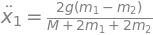

In [22]:
m1_a_conPolea = sym.Eq(x1.diff(t,2), sym.solve(x1_EL_conPolea, x1.diff(t,2) )[0]  )# [0] toma el único elemento de la lista
m1_a_conPolea